In [113]:
from numpy import array
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from keras.preprocessing.sequence import pad_sequences

In [160]:
from keras.datasets import imdb

maxlen = 200
max_features = 20000 #take only most common 20000 words
batch_size = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=max_features,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

### Pad sentences to maxlen

In [128]:
# pad sentences
X_train = pad_sequences(x_train, maxlen)
X_test = pad_sequences(x_test, maxlen)
print('x_train shape:', X_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 200)
x_test shape: (25000,)


# LSTM


In [161]:
model = Sequential()
model.add(Embedding(max_features,128, input_length = maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=-0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 200, 128)          2560000   
_________________________________________________________________
lstm_11 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________
None


In [162]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs = 10, verbose = 1, validation_split=0.2)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 273s 14ms/step - loss: 0.5140 - acc: 0.7293 - val_loss: 0.3597 - val_acc: 0.8466
Epoch 2/10
20000/20000 [==============================] - 276s 14ms/step - loss: 0.2527 - acc: 0.9006 - val_loss: 0.3137 - val_acc: 0.8804
Epoch 3/10
20000/20000 [==============================] - 265s 13ms/step - loss: 0.1588 - acc: 0.9417 - val_loss: 0.3272 - val_acc: 0.8742
Epoch 4/10
20000/20000 [==============================] - 267s 13ms/step - loss: 0.1010 - acc: 0.9666 - val_loss: 0.3824 - val_acc: 0.8626
Epoch 5/10
20000/20000 [==============================] - 257s 13ms/step - loss: 0.0622 - acc: 0.9800 - val_loss: 0.5450 - val_acc: 0.8714
Epoch 6/10
20000/20000 [==============================] - 276s 14ms/step - loss: 0.0470 - acc: 0.9849 - val_loss: 0.6197 - val_acc: 0.8600
Epoch 7/10
20000/20000 [==============================] - 276s 14ms/step - loss: 0.0452 - acc: 0.9858 - val_loss: 0.5

In [163]:
# test accuracy
score,acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Acc: " + str(acc))

25000/25000 [==============================] - 53s 2ms/step
Acc: 0.8471599817276001


### Visualize improvements in accuracy for each epoch

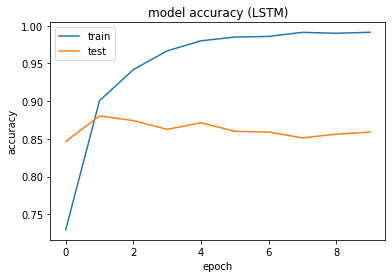

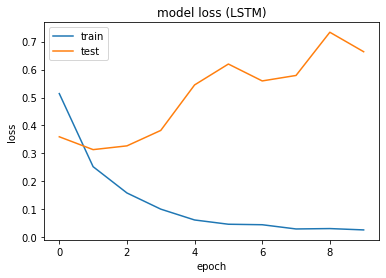

In [164]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy (LSTM)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss (LSTM)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Results of LSTM

1. Training accuracy is high whereas test accuracy remains around 85%
1. As epoch increases, training losses decrease whereas test accuracy increases. This could imply that the model is being overfitted to our training set
1. The point at which there seems to be greatest test accuracy is after 1 epoch, at the intersection between training loss and test loss. (beyond which training loss decreases and test loss increases)

## Using previous embeddings on new model
### Extract embeddings layer

In [134]:
embeddings = model.layers[0].get_weights()[0]
print(len(embeddings[0]))

128


### Using our previously obtain embeddings to obtain a model with high accuracy with just one run.

In [109]:
model2 = Sequential()
model2.add(Embedding(max_features,128, weights = [embeddings], input_length = maxlen))
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=-0.2))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________
None


In [110]:
model2.fit(X_train, y_train, batch_size=batch_size, epochs = 1)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
25000/25000 [==============================] - 361s 14ms/step - loss: 0.1493 - acc: 0.9476


We can see that using previous embeddings allow for a rather high significant training accuracy after just one epoch.

In [111]:
# test accuracy
score,acc = model2.evaluate(X_test, y_test, batch_size=batch_size)
print(acc)

25000/25000 [==============================] - 97s 4ms/step
0.852400004863739


# Convolutional NN (without previous embeddings)

In [136]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [167]:
model_CNN = Sequential()
model_CNN.add(Embedding(max_features, 128, input_length=maxlen))
model_CNN.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(250,activation='relu'))
model_CNN.add(Dense(1,activation='sigmoid'))
model_CNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 200, 128)          2560000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 200, 32)           12320     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 100, 32)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 250)               800250    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 251       
Total params: 3,372,821
Trainable params: 3,372,821
Non-trainable params: 0
___________________________________________

In [168]:
history_CNN = model_CNN.fit(X_train, y_train, validation_split=.2, epochs = 10, batch_size = 128)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.4294 - accuracy: 0.7770 - val_loss: 0.2779 - val_accuracy: 0.8834
Epoch 2/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.1343 - accuracy: 0.9503 - val_loss: 0.3045 - val_accuracy: 0.8796- loss: 0 - ETA: 2s - loss:
Epoch 3/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.0294 - accuracy: 0.9929 - val_loss: 0.4015 - val_accuracy: 0.8822
Epoch 4/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.4804 - val_accuracy: 0.8832
Epoch 5/10
20000/20000 [==============================] - 31s 2ms/step - loss: 8.4591e-04 - accuracy: 0.9999 - val_loss: 0.5319 - val_accuracy: 0.8802
Epoch 6/10
20000/20000 [==============================] - 31s 2ms/step - loss: 3.3290e-04 - accuracy: 1.0000 - val_loss: 0.5710 - val_accuracy: 0.8808
Epoch 7/10
20000/20000 [==========

In [169]:
scores = model_CNN.evaluate(X_test, y_test, verbose=0)
print("Acc: " + str(scores[1]))

Acc: 0.8693199753761292


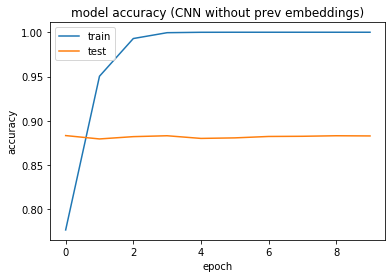

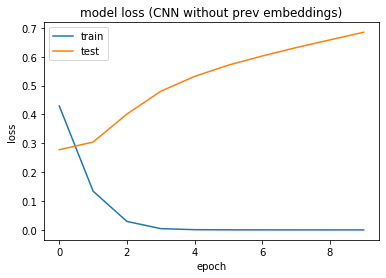

In [170]:
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])

plt.title('model accuracy (CNN without prev embeddings)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])

plt.title('model loss (CNN without prev embeddings)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Convolutional NN (with previous embeddings)

In [152]:
model_CNN = Sequential()
model_CNN.add(Embedding(max_features, 128, weights =[embeddings], input_length=maxlen))
model_CNN.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(250,activation='relu'))
model_CNN.add(Dense(1,activation='sigmoid'))
model_CNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 200, 128)          2560000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200, 32)           12320     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 100, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 250)               800250    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 251       
Total params: 3,372,821
Trainable params: 3,372,821
Non-trainable params: 0
___________________________________________

In [154]:
history_CNN = model_CNN.fit(X_train, y_train, validation_split=.2, epochs = 10, batch_size = 128)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1430 - accuracy: 0.9420 - val_loss: 0.4839 - val_accuracy: 0.8624
Epoch 2/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.6823 - val_accuracy: 0.8482
Epoch 3/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.0047 - accuracy: 0.9996 - val_loss: 0.7881 - val_accuracy: 0.8590
Epoch 4/10
20000/20000 [==============================] - 31s 2ms/step - loss: 9.2797e-04 - accuracy: 0.9999 - val_loss: 0.8576 - val_accuracy: 0.8596
Epoch 5/10
20000/20000 [==============================] - 31s 2ms/step - loss: 2.9901e-04 - accuracy: 1.0000 - val_loss: 0.9206 - val_accuracy: 0.8616
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 1.4873e-04 - accuracy: 1.0000 - val_loss: 0.9740 - val_accuracy: 0.8606
Epoch 7/10
20000/20000 [==============================] -

In [155]:
scores = model_CNN.evaluate(X_test, y_test, verbose=0)
print("Acc: " + str(scores[1]))

Acc: 0.8473600149154663


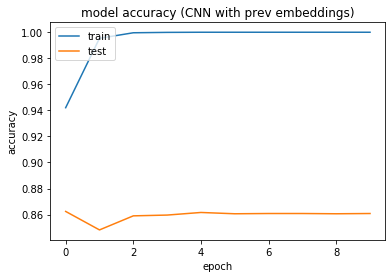

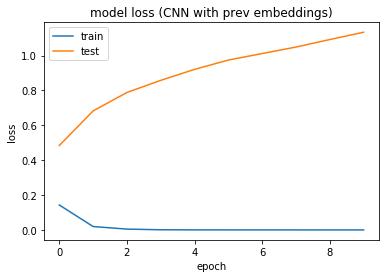

In [156]:
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])

plt.title('model accuracy (CNN with prev embeddings)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])

plt.title('model loss (CNN with prev embeddings)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Result of CNN

1. It is observed that the CNN converges very quickly (even faster if we use previous embeddings), reaching an accuracy of almost 1 for our training set after 2 or 3 epochs.
1. However, the accuracy on our validation sets remain hovering about 87%.
1. We further observe if we continue training after accuracy has reached ~1, the losses during training is extremely low, which could imply overfitting
1. This is further exemplified where as the number of epochs increases, the losses with the validation set increases.
1. This could mean that our resultant model is overfitted and does not generalize well to datasets outside of our training set. 


# Comparisons

1. CNN trains much faster than LSTM
1. CNN has a more consistent validation accuracy
1. The use of embeddings obtained from a previous model allows faster training of a new model
1. Our current models tend to overfit training dataset.
    1. Should train with less epochs.
    1. Need to test with different input lengths, loss functions etc. to try and increase test accuracy